# Multi-tower quantum many-body scars in the PXP model

In [1]:
from tqdm.notebook import tqdm
import qutip as qt
import numpy as np
from importlib import reload
import scipy.sparse

import qims as qims
from matplotlib import pyplot as plt


In [5]:
reload(qims)
Nx = 10
%time bs, bs_ind = qims.basis(Nx, parallel = False)
H = qims.pxp_hamiltonian(bs,bs_ind,Nx)
SZ = qims.sz_neel(size = Nx, basis = bs)
Hs, U = qims.Hk(hamiltonian = H, 
            basis = bs, 
            basis_ind = bs_ind, 
            size = Nx,
            check_spect=True,
            check_symm=True)

  0%|          | 0/1024 [00:00<?, ?it/s]

CPU times: user 58.1 ms, sys: 163 µs, total: 58.3 ms
Wall time: 55 ms


  0%|          | 0/10 [00:00<?, ?it/s]

Setup momentum basis


  0%|          | 0/15 [00:00<?, ?it/s]

Calculating k-basis transformations


  0%|          | 0/10 [00:00<?, ?it/s]

Calculate momentum Hamiltonians


  0%|          | 0/10 [00:00<?, ?it/s]

Run symmetry check:
 -> Passed: Hamiltonian is translationally invariant
Run spectrum check:
 -> Passed: Spectra of full H and the H(k) match


In [6]:
evecs = {}
evals = {}
k_list = np.arange(0, Nx) / Nx
for k in tqdm(k_list):
    # print()
    print(k*Nx,Hs[k].shape[0]/2)
    # evals_temp, evecs_temp = Hs[k].eigenstates()
    # for n in range(len(evals_temp)):
    #     evecs[k,n] = qt.Qobj(U[k])*evecs_temp[n]
    #     # print(evals_temp[n]/2)
    #     evals[k,n] = evals_temp[n]

  0%|          | 0/10 [00:00<?, ?it/s]

0.0 7.5
1.0 5.5
2.0 6.5
3.0 5.5
4.0 6.5
5.0 6.0
6.0 6.5
7.0 5.5
8.0 6.5
9.0 5.5


In [ ]:
qt.qsave(Hs, 'Momentum_Hamiltonians_26')

In [4]:
qt.qsave(Hs, 'Momentum_Hamiltonians_26')

In [12]:
def psi_t(t, psi_0, evecs, evals, Hs):
    
    sm = 0
    for k in k_list:
        for n in range(Hs[k].shape[0]):
            sm = sm + np.exp(-1j*evals[k,n]*t)*(evecs[k,n]*psi_0.dag())*evecs[k,n]
    return sm
    

In [13]:
t_list = np.linspace(0,10,100)
scan = []
for t in tqdm(t_list):
    st = psi_t(t,qt.basis(len(bs),len(bs)-1), evecs,evals,Hs)
    scan.append(np.real((st.dag()*SZ*st).full()[0,0]))

  0%|          | 0/100 [00:00<?, ?it/s]

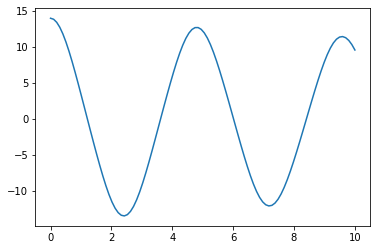

In [14]:
plt.plot(t_list,scan)